# Desafío 5: Usar 127 Qubits

¡Felicitaciones por resolver los desafíos anteriores! Has demostrado que puedes utilizar con éxito circuitos dinámicos.
Como recompensa por llegar tan lejos, podrás usar uno de nuestros dispositivos de 127 qubits.

Como recordatorio, para ganar una insignia por completar el Desafío, debes haber terminado 4 de los 5 laboratorios. Tomamos esa decisión a propósito, porque sabemos que este laboratorio (a) será desafiante técnicamente y (b) utilizará uno de nuestro hardware más avanzado. La verdad al lanzar dispositivos de más de 100 qubits para que los use el público es que puede haber retrasos significativos en su capacidad para ejecutar tus trabajos. Es posible (¡aunque esperamos que no!) que no realices tu trabajo con éxito al final del Desafío. Ten en cuenta que estamos haciendo todo lo posible tras bambalinas para que tu experiencia sea un éxito, pero también tenemos un número récord de participantes en el Desafío de este año. Se amable y no envíes tus circuitos una y otra vez, lo que obstruirá la fila.

Está bien, toma una respiración profunda. ¡Aquí vamos!

Ya has visto que trabajar con dispositivos físicos reales presenta su propio conjunto de desafíos.
Esto es aún más cierto cuando deseas utilizar una gran cantidad de qubits, ya que las rutas pueden volverse largas y debes tener cuidado con la introducción de errores. Usaremos ibm_sherbrook como nuestro dispositivo.

En este desafío, queremos que prepares un estado de 127 qubits completamente entrelazado, el llamado "estado GHZ", de una manera inteligente.

Después de eso, te guiaremos para que apliques tu conocimiento de corrección de errores al estado GHZ de 127 qubits para luego crear un buen estado GHZ de 54 qubits. Para esto, usaremos los qubits pares para el estado GHZ de 54 qubits, lo que deja los qubits impares para usarlos como estabilizadores.

*Nota: Usaremos el mismo registro para los qubits pares e impares, aunque se usarán de manera diferente. Hacemos esto porque facilitará la creación del estado GHZ inicial de 127 qubits, especialmente cuando deseas optimizar la profundidad manualmente.*

In [1]:
# Importing all the parts we need
from typing import List, Optional

from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.result import marginal_counts

import warnings

warnings.filterwarnings("ignore")

import math

pi = math.pi

# Preparing registers
quantum_register = QuantumRegister(127)
classical_register = ClassicalRegister(127)

# For simplicity we map the physical qubits to the logical qubits directly using the same number.
initial_layout = [
    0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76,
    77,
    78,
    79,
    80,
    81,
    82,
    83,
    84,
    85,
    86,
    87,
    88,
    89,
    90,
    91,
    92,
    93,
    94,
    95,
    96,
    97,
    98,
    99,
    100,
    101,
    102,
    103,
    104,
    105,
    106,
    107,
    108,
    109,
    110,
    111,
    112,
    113,
    114,
    115,
    116,
    117,
    118,
    119,
    120,
    121,
    122,
    123,
    124,
    125,
    126,
]
# The "even"" qubits will be used for the 54 qubit GHZ-state
ghz_qubits = [
    0,
    2,
    4,
    6,
    8,
    10,
    12,
    18,
    20,
    22,
    24,
    26,
    28,
    30,
    32,
    37,
    39,
    41,
    43,
    45,
    47,
    49,
    51,
    56,
    58,
    60,
    62,
    64,
    66,
    68,
    70,
    75,
    77,
    79,
    81,
    83,
    85,
    87,
    89,
    94,
    96,
    98,
    100,
    102,
    104,
    106,
    108,
    114,
    116,
    118,
    120,
    122,
    124,
    126,
]
# The "odd" qubits will be used as the stabilizers
stabilizer_qubits = [
    1,
    3,
    5,
    7,
    9,
    11,
    14,
    15,
    16,
    17,
    19,
    21,
    23,
    25,
    27,
    29,
    31,
    33,
    34,
    35,
    36,
    38,
    40,
    42,
    44,
    46,
    48,
    50,
    52,
    53,
    54,
    55,
    57,
    59,
    61,
    63,
    65,
    67,
    69,
    71,
    72,
    73,
    74,
    76,
    78,
    80,
    82,
    84,
    86,
    88,
    90,
    91,
    92,
    93,
    95,
    97,
    99,
    101,
    103,
    105,
    107,
    109,
    110,
    111,
    112,
    115,
    117,
    119,
    121,
    123,
    125,
]

## Paso 1: Crear un estado GHZ Grande

En muchos algoritmos cuánticos se requiere entrelazar varios qubits entre sí. Un estado de uso frecuente en los algoritmos es el estado GHZ generalizado, el estado $(\alpha |00...0\rangle + \beta |11...1\rangle)$ con $\alpha = \beta$

El estado GHZ está completamente entrelazado y se puede generalizar a cualquier número de qubits. ¡Lo usaremos para crear un estado GHZ de 127 qubits!
**No importa cuántos qubits tenga el estado GHZ cuando sea medido, pues todos los qubits serán 0 o todos los qubits serán 1.**


El desafío aquí no es entrelazar 127 qubits en teoría, sino en un dispositivo real. Esto significa que debes tener en cuenta el diseño del dispositivo (por ejemplo, evita usar compuertas CX entre qubits que no están conectados directamente entre sí). También debes intentar que la profundidad del circuito sea lo más baja posible para reducir el ruido.

### Ejercicio 1

Genera un estado GHZ de 127 qubits para el dispositivo de 127 qubits `ibm_sherbrook` utilizando solo compuertas Hadamard y CNOT. Trata de hacer esto con una profundidad del circuito lo más baja posible.

*Hint: Puede ser útil pensar primero en cómo lo harías (con una profundidad mínima) para un dispositivo ideal en el que todos los qubits estén conectados entre sí.*

In [2]:
def generate_ghz127():
    qc = QuantumCircuit(quantum_register, classical_register)

    ###### your code goes here #######
    
    # for i in range(1,len(quantum_register)):
    #     qc.cx(quantum_register[0],quantum_register[i])
    qc.h(quantum_register[62])
    qc.cx(quantum_register[62],quantum_register[63])
    qc.cx(quantum_register[62],quantum_register[61])
    qc.cx(quantum_register[62],quantum_register[72])
    
    qc.cx(quantum_register[63],quantum_register[64])
    qc.cx(quantum_register[61],quantum_register[60])
    qc.cx(quantum_register[72],quantum_register[81])
    
    qc.cx(quantum_register[64],quantum_register[65])
    qc.cx(quantum_register[64],quantum_register[54])
    qc.cx(quantum_register[60],quantum_register[53])
    qc.cx(quantum_register[60],quantum_register[59])
    qc.cx(quantum_register[81],quantum_register[80])
    qc.cx(quantum_register[81],quantum_register[82])
    
    qc.cx(quantum_register[65],quantum_register[66])
    qc.cx(quantum_register[54],quantum_register[45])
    qc.cx(quantum_register[53],quantum_register[41])
    qc.cx(quantum_register[59],quantum_register[58])
    qc.cx(quantum_register[80],quantum_register[79])
    qc.cx(quantum_register[82],quantum_register[83])
    
    qc.cx(quantum_register[66],quantum_register[67])
    qc.cx(quantum_register[66],quantum_register[73])
    qc.cx(quantum_register[45],quantum_register[44])
    qc.cx(quantum_register[45],quantum_register[46])
    qc.cx(quantum_register[41],quantum_register[40])
    qc.cx(quantum_register[41],quantum_register[42])
    qc.cx(quantum_register[58],quantum_register[57])
    qc.cx(quantum_register[58],quantum_register[71])
    qc.cx(quantum_register[79],quantum_register[78])
    qc.cx(quantum_register[79],quantum_register[91])
    qc.cx(quantum_register[83],quantum_register[84])
    qc.cx(quantum_register[83],quantum_register[92])
    
    qc.cx(quantum_register[67],quantum_register[68])
    qc.cx(quantum_register[73],quantum_register[85])
    qc.cx(quantum_register[44],quantum_register[43])
    qc.cx(quantum_register[46],quantum_register[47])
    qc.cx(quantum_register[40],quantum_register[39])
    # qc.cx(quantum_register[42])
    qc.cx(quantum_register[57],quantum_register[56])
    qc.cx(quantum_register[71],quantum_register[77])
    # qc.cx(quantum_register[78])
    qc.cx(quantum_register[91],quantum_register[98])
    # qc.cx(quantum_register[84])
    qc.cx(quantum_register[92],quantum_register[102])
    
    
    qc.cx(quantum_register[68],quantum_register[69])
    qc.cx(quantum_register[68],quantum_register[55])
    qc.cx(quantum_register[85],quantum_register[86])
    qc.cx(quantum_register[43],quantum_register[34])
    qc.cx(quantum_register[47],quantum_register[35])
    qc.cx(quantum_register[47],quantum_register[48])
    qc.cx(quantum_register[39],quantum_register[33])
    qc.cx(quantum_register[39],quantum_register[38])
    qc.cx(quantum_register[56],quantum_register[52])
    qc.cx(quantum_register[77],quantum_register[76])
    qc.cx(quantum_register[98],quantum_register[97])
    qc.cx(quantum_register[98],quantum_register[99])
    qc.cx(quantum_register[102],quantum_register[101])
    qc.cx(quantum_register[102],quantum_register[103])
    
    qc.cx(quantum_register[69],quantum_register[70])
    qc.cx(quantum_register[55],quantum_register[49])
    qc.cx(quantum_register[86],quantum_register[87])
    qc.cx(quantum_register[34],quantum_register[24])
    qc.cx(quantum_register[35],quantum_register[28])
    # qc.cx(quantum_register[48])
    qc.cx(quantum_register[33],quantum_register[20])
    qc.cx(quantum_register[38],quantum_register[37])
    # qc.cx(quantum_register[52])
    qc.cx(quantum_register[76],quantum_register[75])
    qc.cx(quantum_register[97],quantum_register[96])
    qc.cx(quantum_register[99],quantum_register[100])
    # qc.cx(quantum_register[101])
    qc.cx(quantum_register[103],quantum_register[104])
    
    qc.cx(quantum_register[70],quantum_register[74])
    qc.cx(quantum_register[49],quantum_register[50])
    qc.cx(quantum_register[87],quantum_register[88])
    qc.cx(quantum_register[87],quantum_register[93])
    qc.cx(quantum_register[24],quantum_register[23])
    qc.cx(quantum_register[24],quantum_register[25])
    qc.cx(quantum_register[28],quantum_register[27])
    qc.cx(quantum_register[28],quantum_register[29])
    qc.cx(quantum_register[20],quantum_register[19])
    qc.cx(quantum_register[20],quantum_register[21])
    # qc.cx(quantum_register[37])
    qc.cx(quantum_register[75],quantum_register[90])
    qc.cx(quantum_register[96],quantum_register[95])
    qc.cx(quantum_register[96],quantum_register[109])
    qc.cx(quantum_register[100],quantum_register[110])
    qc.cx(quantum_register[104],quantum_register[105])
    qc.cx(quantum_register[104],quantum_register[111])
    
    qc.cx(quantum_register[74],quantum_register[89])
    qc.cx(quantum_register[50],quantum_register[51])
    # qc.cx(quantum_register[88])
    qc.cx(quantum_register[93],quantum_register[106])
    qc.cx(quantum_register[23],quantum_register[22])
    qc.cx(quantum_register[25],quantum_register[26])
    # qc.cx(quantum_register[27])
    qc.cx(quantum_register[29],quantum_register[30])
    qc.cx(quantum_register[19],quantum_register[18])
    # qc.cx(quantum_register[21])
    qc.cx(quantum_register[90],quantum_register[94])
    # qc.cx(quantum_register[95])
    qc.cx(quantum_register[109],quantum_register[114])
    qc.cx(quantum_register[110],quantum_register[118])
    # qc.cx(quantum_register[105])
    qc.cx(quantum_register[111],quantum_register[122])
    
    
    # qc.cx(quantum_register[89])
    qc.cx(quantum_register[51],quantum_register[36])
    qc.cx(quantum_register[106],quantum_register[107])
    qc.cx(quantum_register[22],quantum_register[15])
    qc.cx(quantum_register[26],quantum_register[16])
    qc.cx(quantum_register[30],quantum_register[31])
    qc.cx(quantum_register[18],quantum_register[14])
    # qc.cx(quantum_register[94])
    qc.cx(quantum_register[114],quantum_register[115])
    qc.cx(quantum_register[114],quantum_register[113])
    qc.cx(quantum_register[118],quantum_register[119])
    qc.cx(quantum_register[118],quantum_register[117])
    qc.cx(quantum_register[122],quantum_register[121])
    qc.cx(quantum_register[122],quantum_register[123])
    
    
    qc.cx(quantum_register[36],quantum_register[32])
    qc.cx(quantum_register[107],quantum_register[108])
    qc.cx(quantum_register[15],quantum_register[4])
    qc.cx(quantum_register[16],quantum_register[8])
    # qc.cx(quantum_register[31])
    qc.cx(quantum_register[14],quantum_register[0])
    qc.cx(quantum_register[115],quantum_register[116])
    qc.cx(quantum_register[119],quantum_register[120])
    # qc.cx(quantum_register[117]
    # qc.cx(quantum_register[121])
    qc.cx(quantum_register[123],quantum_register[124])
    
    # qc.cx(quantum_register[32])
    qc.cx(quantum_register[108],quantum_register[112])
    qc.cx(quantum_register[4],quantum_register[3])
    qc.cx(quantum_register[4],quantum_register[5])
    qc.cx(quantum_register[8],quantum_register[7])
    qc.cx(quantum_register[8],quantum_register[9])
    qc.cx(quantum_register[0],quantum_register[1])
    # qc.cx(quantum_register[116])
    # qc.cx(quantum_register[120])
    qc.cx(quantum_register[124],quantum_register[125])
    
    qc.cx(quantum_register[112],quantum_register[126])
    qc.cx(quantum_register[3],quantum_register[2])
    qc.cx(quantum_register[5],quantum_register[6])
    # qc.cx(quantum_register[7])
    qc.cx(quantum_register[9],quantum_register[10])
    # qc.cx(quantum_register[1])
    # qc.cx(quantum_register[125])
    
    # qc.cx(quantum_register[2])
    # qc.cx(quantum_register[6])
    qc.cx(quantum_register[10],quantum_register[11])
    
    # qc.cx(quantum_register[2])
    # qc.cx(quantum_register[6])
    qc.cx(quantum_register[11],quantum_register[12])
    qc.cx(quantum_register[12],quantum_register[13])
    qc.cx(quantum_register[12],quantum_register[17])
    return qc


ghz_circuit = generate_ghz127()
print(ghz_circuit.depth())

22


In [3]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex5a

grade_ex5a(ghz_circuit)

Submitting your answer. Please wait...
Failed: {'errors': [{'message': 'The challenge is not active', 'extensions': {'code': 'INVALID_QUERY'}}]}


## Paso 2: Reducir el tamaño a la mitad

Ahora queremos usar el estado GHZ que creaste para formar un estado GHZ reducido solo usando los Qubits pares. Para ello, necesitaremos desentrelazar los qubits impares, de modo que puedan medirse sin dejar que el estado GHZ colapse.

Como queremos desenredar los Qubits, podemos hacerlo de forma que se generen **estabilizadores**, similar a lo que hiciste en el Laboratorio 4. Los estabilizadores deben ser 0 si ambos qubits con los que están conectados tienen el mismo valor, y deben ser 1 si esos valores son diferentes.

¿Cuál es el punto de hacer esto? Es posible que el observador astuto ya se haya dado cuenta: podemos usar estos estabilizadores para aplicar la corrección de errores al estado GHZ reducido.

### Ejercicio 2

Desentrelaza los qubits impares del estado GHZ creado para crear estabilizadores. Nuevamente, puedes desafiarte a tí mismo para hacer que la profundidad del circuito sea lo más pequeña posible.

*Hint: Ten en cuenta cómo creaste tu estado GHZ arriba. Tu método de desentrelazar es específico de cómo fue creado.*

In [5]:
def deentangle_qubits():
    qc = QuantumCircuit(quantum_register, classical_register)

    ####### your code goes here #######
    
    qc.cx(quantum_register[62],quantum_register[63])
    qc.cx(quantum_register[62],quantum_register[61])
    qc.cx(quantum_register[62],quantum_register[72])
    
    qc.cx(quantum_register[64],quantum_register[65])
    qc.cx(quantum_register[64],quantum_register[54])
    qc.cx(quantum_register[60],quantum_register[53])
    qc.cx(quantum_register[60],quantum_register[59])
    qc.cx(quantum_register[81],quantum_register[80])
    qc.cx(quantum_register[81],quantum_register[82])
        
    qc.cx(quantum_register[66],quantum_register[67])
    qc.cx(quantum_register[66],quantum_register[73])
    qc.cx(quantum_register[45],quantum_register[44])
    qc.cx(quantum_register[45],quantum_register[46])
    qc.cx(quantum_register[41],quantum_register[40])
    qc.cx(quantum_register[41],quantum_register[42])
    qc.cx(quantum_register[58],quantum_register[57])
    qc.cx(quantum_register[58],quantum_register[71])
    qc.cx(quantum_register[79],quantum_register[78])
    qc.cx(quantum_register[79],quantum_register[91])
    qc.cx(quantum_register[83],quantum_register[84])
    qc.cx(quantum_register[83],quantum_register[92])
        
    qc.cx(quantum_register[68],quantum_register[69])
    qc.cx(quantum_register[68],quantum_register[55])
    qc.cx(quantum_register[85],quantum_register[86])
    qc.cx(quantum_register[43],quantum_register[34])
    qc.cx(quantum_register[47],quantum_register[35])
    qc.cx(quantum_register[47],quantum_register[48])
    qc.cx(quantum_register[39],quantum_register[33])
    qc.cx(quantum_register[39],quantum_register[38])
    qc.cx(quantum_register[56],quantum_register[52])
    qc.cx(quantum_register[77],quantum_register[76])
    qc.cx(quantum_register[98],quantum_register[97])
    qc.cx(quantum_register[98],quantum_register[99])
    qc.cx(quantum_register[102],quantum_register[101])
    qc.cx(quantum_register[102],quantum_register[103])
        
    qc.cx(quantum_register[70],quantum_register[74])
    qc.cx(quantum_register[49],quantum_register[50])
    qc.cx(quantum_register[87],quantum_register[88])
    qc.cx(quantum_register[87],quantum_register[93])
    qc.cx(quantum_register[24],quantum_register[23])
    qc.cx(quantum_register[24],quantum_register[25])
    qc.cx(quantum_register[28],quantum_register[27])
    qc.cx(quantum_register[28],quantum_register[29])
    qc.cx(quantum_register[20],quantum_register[19])
    qc.cx(quantum_register[20],quantum_register[21])
    qc.cx(quantum_register[75],quantum_register[90])
    qc.cx(quantum_register[96],quantum_register[95])
    qc.cx(quantum_register[96],quantum_register[109])
    qc.cx(quantum_register[100],quantum_register[110])
    qc.cx(quantum_register[104],quantum_register[105])
    qc.cx(quantum_register[104],quantum_register[111])
    
    
    qc.cx(quantum_register[51],quantum_register[36])
    qc.cx(quantum_register[106],quantum_register[107])
    qc.cx(quantum_register[22],quantum_register[15])
    qc.cx(quantum_register[26],quantum_register[16])
    qc.cx(quantum_register[30],quantum_register[31])
    qc.cx(quantum_register[18],quantum_register[14])
    qc.cx(quantum_register[114],quantum_register[115])
    qc.cx(quantum_register[114],quantum_register[113])
    qc.cx(quantum_register[118],quantum_register[119])
    qc.cx(quantum_register[118],quantum_register[117])
    qc.cx(quantum_register[122],quantum_register[121])
    qc.cx(quantum_register[122],quantum_register[123])
    

    qc.cx(quantum_register[108],quantum_register[112])
    qc.cx(quantum_register[4],quantum_register[3])
    qc.cx(quantum_register[4],quantum_register[5])
    qc.cx(quantum_register[8],quantum_register[7])
    qc.cx(quantum_register[8],quantum_register[9])
    qc.cx(quantum_register[0],quantum_register[1])
    qc.cx(quantum_register[124],quantum_register[125])
    
    qc.cx(quantum_register[10],quantum_register[11])
    
    qc.cx(quantum_register[12],quantum_register[13])
    qc.cx(quantum_register[12],quantum_register[17])
    
    return qc


unentangle_circuit = deentangle_qubits()
print(unentangle_circuit.depth())
complete_circuit = ghz_circuit.compose(unentangle_circuit)
# unentangle_circuit.draw('mpl')

3


In [23]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex5b

grade_ex5b(complete_circuit)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Buen trabajo. Ahora que todos los qubits impares están desentrelazados de los qubits pares, podemos medirlos sin colapsar el estado GHZ.

In [6]:
# Measuring stabilizers this can also be used in post processing to see what went wrong.


def measure_stabilizers():
    qc = QuantumCircuit(quantum_register, classical_register)
    qc.measure(stabilizer_qubits, stabilizer_qubits)
    return qc


stabilizer_circuit = measure_stabilizers()

Estos resultados de medición podrían usarse para mejorar el estado GHZ de 54 qubits, pero exploraremos esa idea más adelante.

Después de haber medido los qubits impares, puedes restablecerlos y usar el estado de 54 GHZ en tu algoritmo, usando los qubits impares como posibles qubits auxiliares. Sin embargo, antes de usar tu estado GHZ, probemos qué tan bueno es.

¡Necesitamos medir el estado GHZ de 54 qubits!

In [7]:
# Measuring the GHZ qubits


def measure_ghz():
    qc = QuantumCircuit(quantum_register, classical_register)
    qc.measure(ghz_qubits, ghz_qubits)
    return qc


measure_circuit = measure_ghz()

Ahora pongamos todo junto, para que podamos probarlo.

In [8]:
# Everything together

simple_ghz = (
    ghz_circuit.compose(unentangle_circuit)
    .compose(stabilizer_circuit)
    .compose(measure_circuit)
)

## Paso 3: Preparar y ejecutar en el Dispositivo

Ahora estamos listos para ejecutar nuestro estado GHZ en un dispositivo real, y para eso es el momento de `ibm_sherbrooke`

No hay muchas personas en el mundo que hayan trabajado con 127 qubits. Pronto serás una de las pocas almas valientes en decir que lo ha hecho. Un pequeño paso para la computación cuántica, un gran salto para tu CV.

Es broma :-P

-----

Primero preparamos todo lo que necesitamos:

In [2]:
# Importing provider and getting access to the system
from qiskit_ibm_provider import IBMProvider
from qiskit import transpile


provider = IBMProvider()

hub = "qc-spring-23-3"
group = "group-5"
project = "receYxLkt73zVssHq"

backend_name = "ibm_sherbrooke"
backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")

number_of_shots: int = 1024

Traceback (most recent call last):
  Cell In[2], line 13
    backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")
  File /opt/conda/lib/python3.10/site-packages/qiskit_ibm_provider/ibm_provider.py:656 in get_backend
    backends = self.backends(name, instance=instance, **kwargs)
  File /opt/conda/lib/python3.10/site-packages/qiskit_ibm_provider/ibm_provider.py:557 in backends
    return self._backend.backends(
  File /opt/conda/lib/python3.10/site-packages/qiskit_ibm_provider/ibm_backend_service.py:165 in backends
    raise QiskitBackendNotFoundError("No backend matches the criteria")
QiskitBackendNotFoundError: 'No backend matches the criteria'

Use %tb to get the full traceback.


In [10]:
print(backend.coupling_map)

[[1, 0], [1, 2], [3, 2], [4, 3], [4, 15], [5, 4], [6, 5], [7, 6], [8, 7], [8, 9], [10, 9], [10, 11], [11, 12], [12, 13], [14, 0], [14, 18], [16, 8], [17, 12], [17, 30], [18, 19], [19, 20], [20, 33], [21, 20], [21, 22], [22, 15], [23, 22], [23, 24], [25, 24], [26, 16], [26, 25], [26, 27], [28, 27], [29, 28], [29, 30], [31, 30], [31, 32], [32, 36], [33, 39], [34, 24], [35, 28], [35, 47], [36, 51], [37, 38], [38, 39], [40, 39], [41, 40], [41, 53], [42, 41], [43, 34], [43, 42], [43, 44], [45, 44], [45, 46], [47, 46], [47, 48], [49, 48], [49, 50], [50, 51], [52, 37], [53, 60], [54, 45], [55, 49], [56, 52], [56, 57], [57, 58], [59, 58], [59, 60], [61, 60], [61, 62], [63, 62], [63, 64], [64, 54], [64, 65], [66, 65], [67, 66], [68, 55], [68, 67], [69, 68], [69, 70], [71, 58], [71, 77], [72, 62], [73, 66], [73, 85], [74, 70], [75, 76], [77, 76], [78, 77], [78, 79], [79, 91], [80, 79], [80, 81], [81, 72], [81, 82], [82, 83], [84, 83], [85, 84], [86, 85], [86, 87], [87, 88], [89, 74], [89, 88], [

Comenzamos transpilándolo para el dispositivo real. Esto no debería causar demasiados cambios, ya que (debes haber) tenido en mente el dispositivo físico cuando hiciste el circuito originalmente, y solo usaste las conexiones que existen.

Si no lo hiciste, ahora es un buen momento para regresar y arreglarlo, o saltar a Discord para hablar con otros sobre cómo pensar en ese proceso.

In [12]:
# First we transpile the GHZ-state for the actual device
qc_transpiled = transpile(simple_ghz, backend, initial_layout=initial_layout)

Ahora estamos listos para ejecutar el trabajo en el dispositivo de 127 qubits. Agreguemos algunas etiquetas aquí para que sea más fácil encontrarlas en el futuro.

Ejecutar el trabajo (job) llevará algún tiempo, dependiendo de cuántas otras personas estén en la fila tratando de ejecutar sus trabajos. ¿Ya tomaste tu café hoy? O tal vez eres más un bebedor de té. Escuché que hay un gran programa nuevo en Netflix.

In [ ]:
# Now we can run the job
# We add memory=true to be easier able to analyse  how good the result were and the tags to make it easier to find it later.
job = backend.run(
    qc_transpiled,
    shots=number_of_shots,
    memory=True,
    job_tags=["ghz_state", "spring_challenge"],
)

job_id = job.job_id()
print(job_id)

En caso de que regreses más tarde y desees recuperar un trabajo (job), puedes encontrarlo en la página de inicio de IBM Quantum Computing con las etiquetas utilizadas anteriormente.

Copia el nombre de su trabajo (su id) y reemplaza el *job_id* en la celda de abajo con el suyo. Una identificación de trabajo debería verse así: *ch36cf1pleju56fajrqg*

O simplemente puedes usar directamente el job_id de la celda anterior.

In [1]:
from qiskit_ibm_provider import IBMProvider
from qiskit import transpile


provider = IBMProvider()

In [3]:
# Change job id to the id of your previous submitted job something like "ch36cf1pleju56fajrqg"
# You only need to run this if you come back at a later time
from qiskit_ibm_provider import IBMProvider
job = provider.backend.retrieve_job('chmh1qtnopt07g48glc0')
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [4]:
# Getting the data of the job for testing
data_list = job.result().get_memory()

In [9]:
print(len(data_list))

1024


In [10]:
data_list[:5]

['0000000000000001110000001111111100010100110100101000010010101100001100010000000000000000000001000000001100001000000000000000000',
 '1010101010101001101010111000101010110101010001010101011010110011011110100001010101010101010000101010100100101000000000001110101',
 '0001110000000000100001110111110001010011000000001000010100011100001111000000000100000001010101010000010101010001000110100000000',
 '1010100010101000001010011010101010000101011101010111010010110111011010100001010101010101010010101111110110101000001100001010101',
 '1010101010000001011010111111001110100101011001010101011110110011101001100101010101010101010000101101101000101000000000001000101']

## Paso 4: Probar del estado GHZ

¡Lo hiciste! Has ejecutado un circuito de estado GHZ en una máquina de 127 qubits. ¡¡¡Eso es genial!!!

Ahora que tienes los resultados de tu estado GHZ, es hora de examinarlos. No agregamos ninguna mitigación o corrección de errores, por lo que debes esperar resultados que aún se pueden mejorar.

Hay diferentes formas de probar qué tan "buenos" son los resultados. Puedes simplemente mirar los resultados sin procesar, pero dado que los qubits que se usan para el estado GHZ no están uno al lado del otro, esto puede ser un poco molesto. Sería útil tener una función que nos informe sobre la calidad o sobre los errores en el estado GHZ.

### Ejercicio 3

Crea una función para probar el estado GHZ.

Como autores del Desafío, decidimos darte algo de libertad aquí sobre cómo quieres probar tus resultados. Encuentra una manera que tenga sentido **para ti.** Es importante decir que cuanto _menor sea la salida_ de tu función, _mejor_ será su estado GHZ.

*Hint: esta función debe realizarse para probar los datos que hemos creado, por lo que solo necesitas probar los qubits que forman parte del estado GHZ*

In [26]:
def test_ghz(data):
    ghz_qubits = [
        0,
        2,
        4,
        6,
        8,
        10,
        12,
        18,
        20,
        22,
        24,
        26,
        28,
        30,
        32,
        37,
        39,
        41,
        43,
        45,
        47,
        49,
        51,
        56,
        58,
        60,
        62,
        64,
        66,
        68,
        70,
        75,
        77,
        79,
        81,
        83,
        85,
        81,
        89,
        94,
        96,
        98,
        100,
        102,
        104,
        106,
        108,
        114,
        116,
        118,
        120,
        122,
        124,
        126,
    ]
    quality_list = []
    average = 0
    best = len(data)
    worst = 0

    for result in data:
        count_zeroes = 0
        count_ones = 0
        bit_count = -1
        for bit in result:
            bit_count = bit_count + 1
            if bit_count not in ghz_qubits:
                continue
            if bit == "0":
                count_zeroes = count_zeroes + 1
            else:
                count_ones = count_ones + 1
        if count_ones < count_zeroes:
            count_zeroes = count_ones

        quality_list.append(count_zeroes)
        average = average + count_zeroes

        if count_zeroes > worst:
            worst = count_zeroes
        if count_zeroes < best:
            best = count_zeroes

    average = average / len(data)
    print(average)
    print(worst)
    print(best)
    return average

count_before=test_ghz(data_list)

15.861328125
26
3


Ahora tienes un número que califica tus resultados, según una función que diseñaste.

Antes de continuar, piensa en tu método.
- ¿Cuál sería el número para un estado realmente bueno?
- ¿Qué hay de un estado realmente malo?
- ¿Qué aspecto tiene un "mal estado"?
- ¿Cómo puedes diseñar una función que sea fácil para que alguien entienda lo que le está diciendo?

Todas estas son preguntas en las que los investigadores de IBM piensan a diario y nos mantienen extremadamente motivados para continuar haciendo que nuestros dispositivos y servicios sean lo más posiblemente fuertes y fáciles de entender. Si este tipo de trabajo también te interesa, ¡háznoslo saber!

Ahora probemos tu función de prueba y veamos si hace lo que debería. Recuerda, debería dar resultados bajos para estados buenos, que tienen menos errores, y resultados altos para estados con muchos errores.

In [17]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex5c

# Since we test here a function, we do not need brackets after test_ghz, since the input is the function
grade_ex5c(test_ghz)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Ahora la pregunta es: ¿cómo podemos mejorarlo?

Uno de los primeros pasos sería tratar de disminuir aún más la profundidad del circuito. Veamos la profundidad de su circuito transpilado:

In [13]:
qc_transpiled.depth()

67

Podemos ver que la profundidad aumentó durante el proceso de transpilación, en más de un factor de 2.

Echa un vistazo a cómo se ve, para ver de dónde viene esta profundidad adicional:

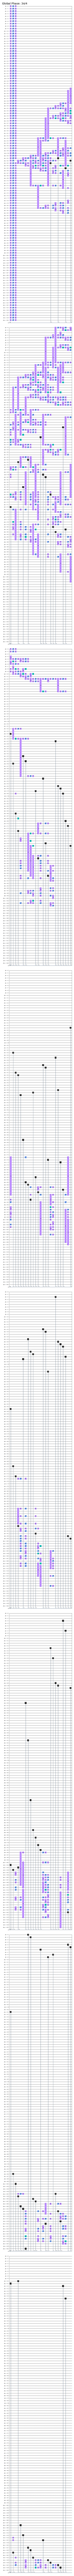

In [16]:
qc_transpiled.draw(scale=0.2)

Lo que vemos es que la compuerta Hadamard y la compuerta CX se transpilaron a otras compuertas. Esto no es sorprendente para la compuerta Hadamard, ya que ninguno de los dispositivos IBM Quantum la admite directamente. Una Hadamard siempre se construye usando 3 rotaciones. Por otro lado, la compuerta ECR que ves es nueva y solo se usa en algunos dispositivos. También es una compuerta de entrelazamiento, similar a la compuerta CX, pero funciona un poco diferente. Se puede hacer una compuerta CX usando solo una compuerta ECR y rotaciones locales.

Puede encontrar más información sobre la compuerta ECR aquí:
https://qiskit.org/documentation/stable/0.39/stubs/qiskit.circuit.library.ECRGate.html 


Reducir la profundidad suele ser la mejor manera de minimizar la tasa de error. Ahora que sabes que en su lugar se usa la compuerta ECR, ¿podrías hacer un circuito con una mejor profundidad?

Si estás interesado en explorar esa pregunta y otros métodos para mejorar el estado GHZ, no dudes en seguir leyendo. La siguiente parte del laboratorio es extra: no quedan ejercicios. Se entiende como una breve perspectiva para mostrar cómo se podría usar la corrección de errores, pero también para mostrar por qué la corrección de errores puede ser difícil.


Ya sea que elijas continuar o no, date un aplauso: **¡Acabas de completar el IBM Quantum Challenge: Spring de 2023!** ¡Presume de ello con todos los demás en Discord, nos vemos allí!

# Extra: La Manera de Corregir Errores

La corrección de errores sigue siendo un tema de investigación activo e importante. Por lo tanto, corregir errores en un dispositivo real, incluso en un caso simple como nuestro ejemplo de estado GHZ, no es tan sencillo y queremos darle la oportunidad de generar tus propias ideas, mientras te brindamos orientación y sugerencias sobre qué posibles formas podrían ser.



## Paso 1: ¿Qué tan bueno es el Estado actual?

Antes de que podamos corregir cualquier error, primero debemos saber qué tan bueno era el estado, e incluso esto no es tan sencillo como podría pensarse.


La forma más sencilla de probar qué tan bueno fue tu estado GHZ es probar cuántos de los qubits pares tienen resultados diferentes de la mayoría. Esto es lo que probablemente hayas usado arriba.


Sin embargo, esto no significa necesariamente que esto también se correlacionó con la cantidad de errores que ocurrieron. Y uno podría decir que la cantidad de errores que ocurrieron es más importante, para decir qué tan bueno es el estado GHZ.


**Ejemplo A** para ilustrar este pensamiento: Digamos que tenemos 10 qubits conectados en una línea y formamos un estado GHZ con ellos:

0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9

Si ahora decimos que el error no ocurrió en la lectura, pero al aplicar la compuerta entrelazadora entre el qubit 4 y el qubit 5, la salida podría verse así:

0000011111 

Este sería el peor resultado posible para la medición de "cuántos qubits tienen el mismo resultado".

Por esta razón, una ejecución en la que se produjeron más errores podría conducir a una mejor medida de "cuántos qubits tienen el mismo resultado", aunque lo más probable es que ese estado sea mucho menos útil.

Si se hubiera creado el estado anterior y tuvieras mediciones estabilizadoras (en funcionamiento) entre los qubits, solo tendrías el qubit 4 y el 5 con 1. Y para corregir ese error, podrías simplemente voltear los qubits del 5 al 9.


Para tener una primera idea de cómo se ven los errores en tu caso, podría ser una buena idea mirar los datos sin procesar, los resultados que obtuviste al ejecutarlos en el dispositivo real y tener en cuenta cómo construiste el estado GHZ.


Para el **Ejemplo A**, tal vez podríamos encontrar una corrección de errores que se vería así:


In [22]:
# Simple idea for Example A find where the error happened and flip accordingly
def correct_ghz():
    qc = QuantumCircuit(quantum_register, classical_register)
    counter=1
    
    for data in data_list:
        print(counter)
        stab_list=[]
        ghz_list=[]
        not_list = []
        
        for i,d in enumerate(data):
            if i in stabilizer_qubits:
                  stab_list.append([i,d])    
            elif i in ghz_qubits:
                  ghz_list.append([i,d])

        for i,b in stab_list:
            if b == '1':
                for c,t in backend.coupling_map:
                    if i in [c,t]:
                        if i==c:
                            not_list.append(t)
                        elif i==t:
                            not_list.append(c)
        
        not_list=list(set(not_list))
        counter+=1

        for i in not_list:
            qc.x(quantum_register[i])

    return qc


correcting_circuit = correct_ghz()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Y si ahora adaptáramos el código anterior a nuestro caso de GHZ de 54, podríamos construir todo junto:

In [23]:
# Everything together corrected

error_corrected_ghz = (
    ghz_circuit.compose(unentangle_circuit)
    .compose(stabilizer_circuit)
    .compose(correcting_circuit)
    .compose(measure_circuit)
)

## Paso 2: Por qué considerar estabilizadores individuales podría no ser suficiente.

En el ejercicio de corrección de errores, hemos visto que puedes usar bits individuales o toda la cadena de bits de la medición de los qubits estabilizadores para condicionar las operaciones en ellos.

Dado que nuestras mediciones de estabilizador tienen una longitud de 54 bits, no es factible usar cadenas de bits completas para condicionarlas, ya que esto necesitaría 2^54 cadenas de bits diferentes que deben tenerse en cuenta.


Por otro lado, si solo consideramos un solo bit, podría no ser posible/demasiado complicado.


**Ejemplo B**: Tenemos nuevamente 10 qubits conectados en una línea y formamos un estado GHZ con ellos:

0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9

Ahora asumimos que obtenemos como resultado de la medición 0000010000

Si tenemos medidas de estabilizadores, en este caso el de la derecha del 1 y el de la izquierda del 1 tendrían ambos valor 1.

Esto significa que, en este caso, mirar un solo estabilizador no sería suficiente para saber que solo necesitas invertir el qubit número 5 (y ningún otro), a menos que estemos de acuerdo con voltear algunos qubits varias veces, lo cual no es lo ideal.

Entonces, en este caso, sería ideal si pudiéramos aplicar funciones a los resultados de medición de los estabilizadores y usar sus resultados como condiciones en los circuitos dinámicos.

Esto es posible, sin embargo, debe hacerse en el código Open QASM3, en lugar de en Qiskit, que no se tratará en este ejercicio.
Si estás interesado en obtener más información sobre los circuitos dinámicos con Open QASM3, puedes encontrar información al respecto aquí:

https://quantum-computing.ibm.com/services/resources/docs/resources/manage/systems/dynamic-circuits/Dynamic-Circuits-basics-with-OpenQASM3


A continuación se muestra un ejemplo simple para mostrarte cómo se ve el código Open QASM3:


OPENQASM 3;
bit[2] c;
rz(-3.141592653589793) $0;
sx $0;
rz(-1.5707963267948966) $1;
sx $1;
rz(-3.141592653589793) $1;
ecr $1, $0;
rz(-1.5707963267948966) $0;
sx $0;
rz(1.5707963267948966) $0;
rz(1.5707963267948966) $1;
sx $1;
rz(1.5707963267948966) $1;
c[0] = measure $0;
c[1] = measure $0;



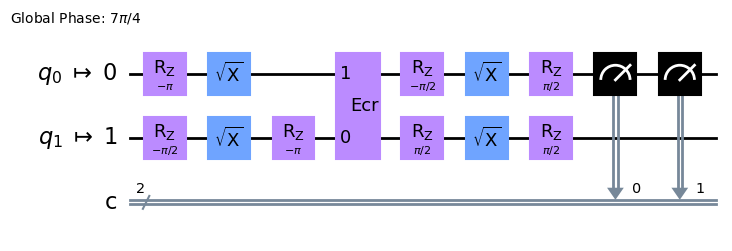

In [24]:
from qiskit import qasm3, QuantumCircuit, transpile

# Creating a bell circuit
qc_bell = QuantumCircuit(2, 2)
qc_bell.h(0)
qc_bell.cx(0, 1)
qc_bell.measure(0, 0)
qc_bell.measure(0, 1)

# Transpiling it for our device (as above it does not have the H- and CX- Gates)
qc_bell = transpile(qc_bell, backend)

# Generate qasm3 code before we can print it
exporter = qasm3.Exporter(
    includes=[], disable_constants=True, basis_gates=backend.configuration().basis_gates
)
print(qasm3_bell := exporter.dumps(qc_bell))

# Draw a circuit as comparison
qc_bell.draw(output="mpl", idle_wires=False)

## Paso 3: Cómo no introducir más Errores

Hay diferentes razones que pueden conducir a errores. La decoherencia a lo largo del tiempo y los errores introducidos en compuertas entrelazadas como la compuerta CX son dos de ellos. Ambos también pueden aplicarse a los estabilizadores y tenemos que asegurarnos de no introducir más ruido en nuestros intentos de corregirlo, ya que eso anularía todo el propósito. Esto podría ser un problema menor en el futuro, cuando la tasa de error general baje aún más, pero aún es algo que debe tenerse en cuenta.

¿Qué significa esto para nosotros?

Bueno, uno puede pensar en cuándo queremos crear y medir los estabilizadores. ¿Los desentrelazamos directamente después de que ya no se usan para entrelazar el próximo qubit? ¿Esperamos hasta que todo el circuito esté entrelazado? (Esto, por supuesto, depende de qué tipo de errores queramos corregir). También podemos pensar en resetear los estabilizadores y crear otros nuevos más tarde (utilizando los mismos qubits) y utilizar 2 fases en las que intentamos corregir errores.



Y podemos pensar cuál es la probabilidad de que se produzca un error al entrelazar un qubit (a través del estabilizador) y compararlo con la probabilidad de que se introduzca un error en el estabilizador al desentrelazarlo. Entonces, ¿tal vez tener los estabilizadores solo lo empeora?

¿Cuándo vale la pena esto? Puedes jugar con el código a continuación para obtener algunas impresiones e ideas, nuevamente, esto es algo que puede cambiar en el futuro, cuando las tasas de error disminuyan aún más.

In [25]:
# All the probabilities here only consider errors introduced by the CX gate and assumes they are bit flip errors.

# Probability for a single CX gate
p1 = 0.01
# Probability that there is an error after 2 CX gates (going through stabilizer)
p2 = p1 * (1 - p1) + (1 - p1) * p1
# Probability that the stabilizer shows something wrong even though it is correct
p3 = p1 * p1 + (1 - p1) * (1 - p1) * p1

print("Probability of a single cx having an error: {}".format(p1))
print("Probability of having an error after 2 cx: {:.4f}".format(p2))
print("Probability of the stabilizer showing a non existent error: {:.4f}".format(p3))

Probability of a single cx having an error: 0.01
Probability of having an error after 2 cx: 0.0198
Probability of the stabilizer showing a non existent error: 0.0099


## Paso 4: ¿Qué se puede hacer?

Hay muchas posibilidades que puedes probar:



- Puedes intentar encontrar algunas buenas funciones lógicas usando varios estabilizadores y usar QASM3

- Puedes pensar en restablecer los estabilizadores y reutilizarlos.

- Puedes probar si el enfoque simple como se ve en el ejemplo A podría funcionar (cambiando el momento en que se realizan las mediciones).

- ¡Puedes encontrar tu propia idea! ¡sé creativo!


Lo que es importante para todos ellos es que no solo comiences a probar ciegamente en la computadora cuántica, sino que primero intentes verificar tus ideas utilizando los datos al dejar que el estado GHZ inicial se ejecute en el dispositivo.

Has creado datos de prueba arriba: tienes la salida del estado GHZ y también la salida de los estabilizadores.


Si tu enfoque no funciona como posprocesamiento, entonces ejecutarlo en el dispositivo real, donde todas las operaciones tienen una tasa de error adicional, tampoco funcionará.

Cuando tienes un algoritmo que funciona en teoría con los datos que tienes y generaste un mejor estado GHZ de acuerdo con tu prueba, puedes usar el código a continuación para intentar que todo tu circuito, incluida la corrección de errores, se ejecute en el dispositivo real.

*Hint: asegúrate de usar la función error_correction anterior y también genera el error_corrected_ghz anterior.*

In [26]:
# First we transpile the GHZ-state for the actual device
qc_corrected_transpiled = transpile(
    error_corrected_ghz, backend, initial_layout=initial_layout
)

# Now we can run the job
job_corrected = backend.run(
    qc_corrected_transpiled,
    dynamic=True,
    shots=number_of_shots,
    # memory=True,
    job_tags=["dynamic", "spring_challenge"],
)

job_id = job_corrected.job_id()
print(job_id)

chnflfqnajhpa63nfolg


In [12]:
job_corrected = provider.retrieve_job('chnflfqnajhpa63nfolg')
job_corrected.status()

<JobStatus.DONE: 'job has successfully run'>

In [13]:
# And get the results back
counts_corrected = job_corrected.result().get_counts()

In [14]:
list(counts_corrected)[:5]

['0000001000000001001010100011010000110101010101000101010000111010001010100000110001010001000000101000100100000001001011100010100',
 '0000001000000001001011010010100000000101011001000101011000101011011010000000000011010110010010001000101001111001000001100010101',
 '0000001000001000000000000010100011100011110111000000001110011100100011000101100111100100010001000101100100000010000010001110100',
 '0000001000001000001001100010100000010101101101100101011001001010001010100000000011010001000001101011000010000000001101101100000',
 '0000001000001000001010000010100000000101100001001101010000111011101010100101010001110000010001001111001110010000000010001000000']

In [15]:
len(counts_corrected)

1024

In [27]:
count_after=test_ghz(list(counts_corrected))

23.66796875
26
16


In [28]:
count_after<count_before

False

In [29]:
count_before

15.861328125

In [30]:
count_after

23.66796875

393215.1024